In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm




#загрузка данных
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')

#добавляю колонку с датой, выбираю период(данные за октябрь теряются, другой формат наименования аэропортов)

flights['HOUR'] = flights['SCHEDULED_DEPARTURE']//100
flights['MINUTE'] = flights['SCHEDULED_DEPARTURE']%100
flights['DATE_DAY'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])
flights['DATE_TIME'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])
flights['DATE_HOUR'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY', 'HOUR']])

flights['PROBABILITY'] = np.where(flights['DEPARTURE_DELAY']>0, 0, 1)



flights = flights.loc[flights['DATE_DAY'].between('2015-01-01', '2015-09-30')]

B = flights.groupby(['ORIGIN_AIRPORT', 'DATE_HOUR'])['DATE_DAY'].count().reset_index().rename(columns={'DATE_DAY': 'COUNT_HOUR'})
flights = flights.merge(B, how='left', left_on=['ORIGIN_AIRPORT', 'DATE_HOUR'], right_on = ['ORIGIN_AIRPORT', 'DATE_HOUR'])
B = flights.groupby(['ORIGIN_AIRPORT', 'DATE_DAY'])['DATE_HOUR'].count().reset_index().rename(columns={'DATE_HOUR': 'COUNT_DAY'})
flights = flights.merge(B, how='left', left_on=['ORIGIN_AIRPORT', 'DATE_DAY'], right_on = ['ORIGIN_AIRPORT', 'DATE_DAY'])




/var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_28932/177399830.py:18: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


array([<AxesSubplot:title={'center':'0'}>], dtype=object)

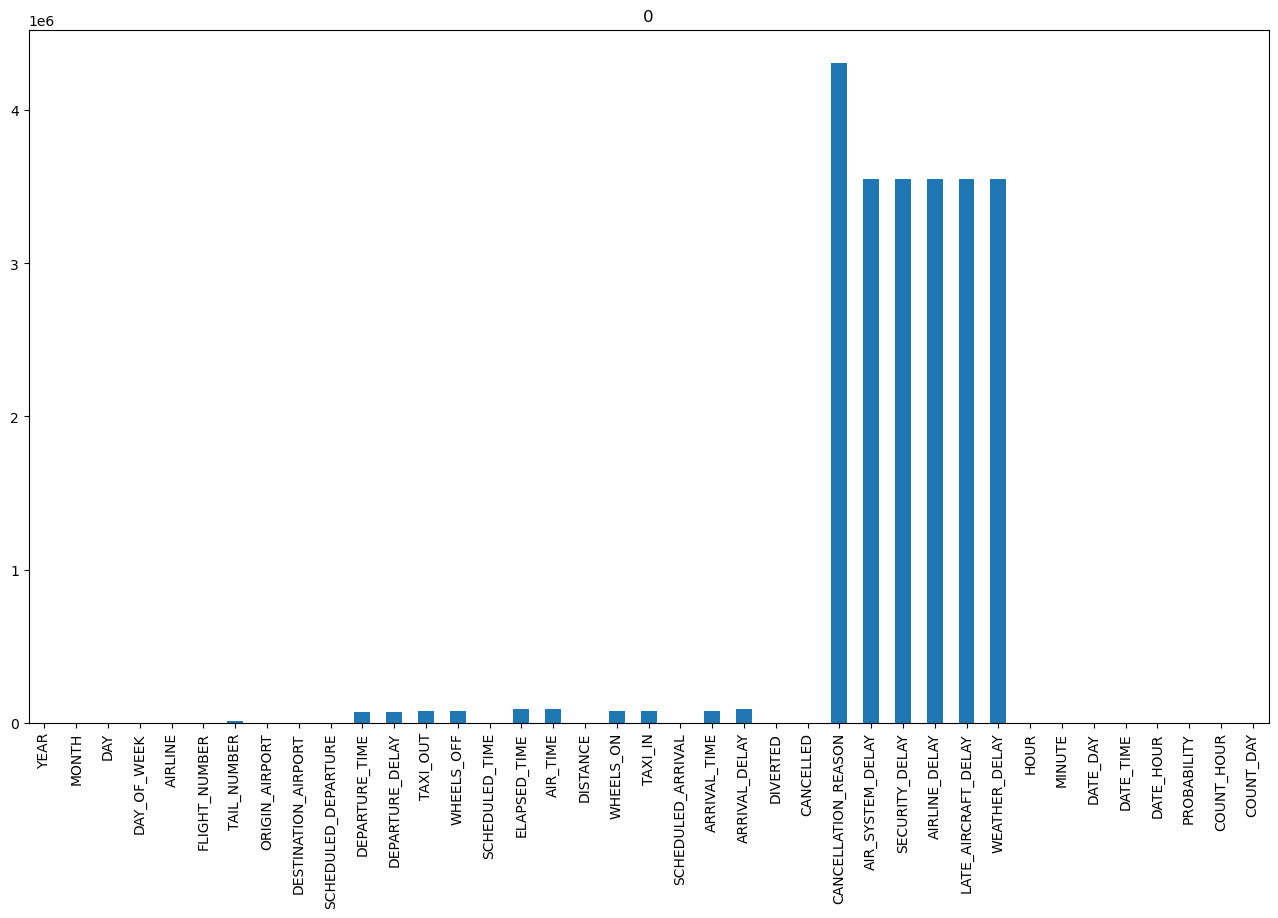

In [58]:
A = pd.DataFrame(flights.isna().sum())
A.plot(kind='bar', subplots=True, figsize=[16, 9], legend=None)


In [60]:
A.rename(columns={0:'HBHB'})

,HBHB
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,12674
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


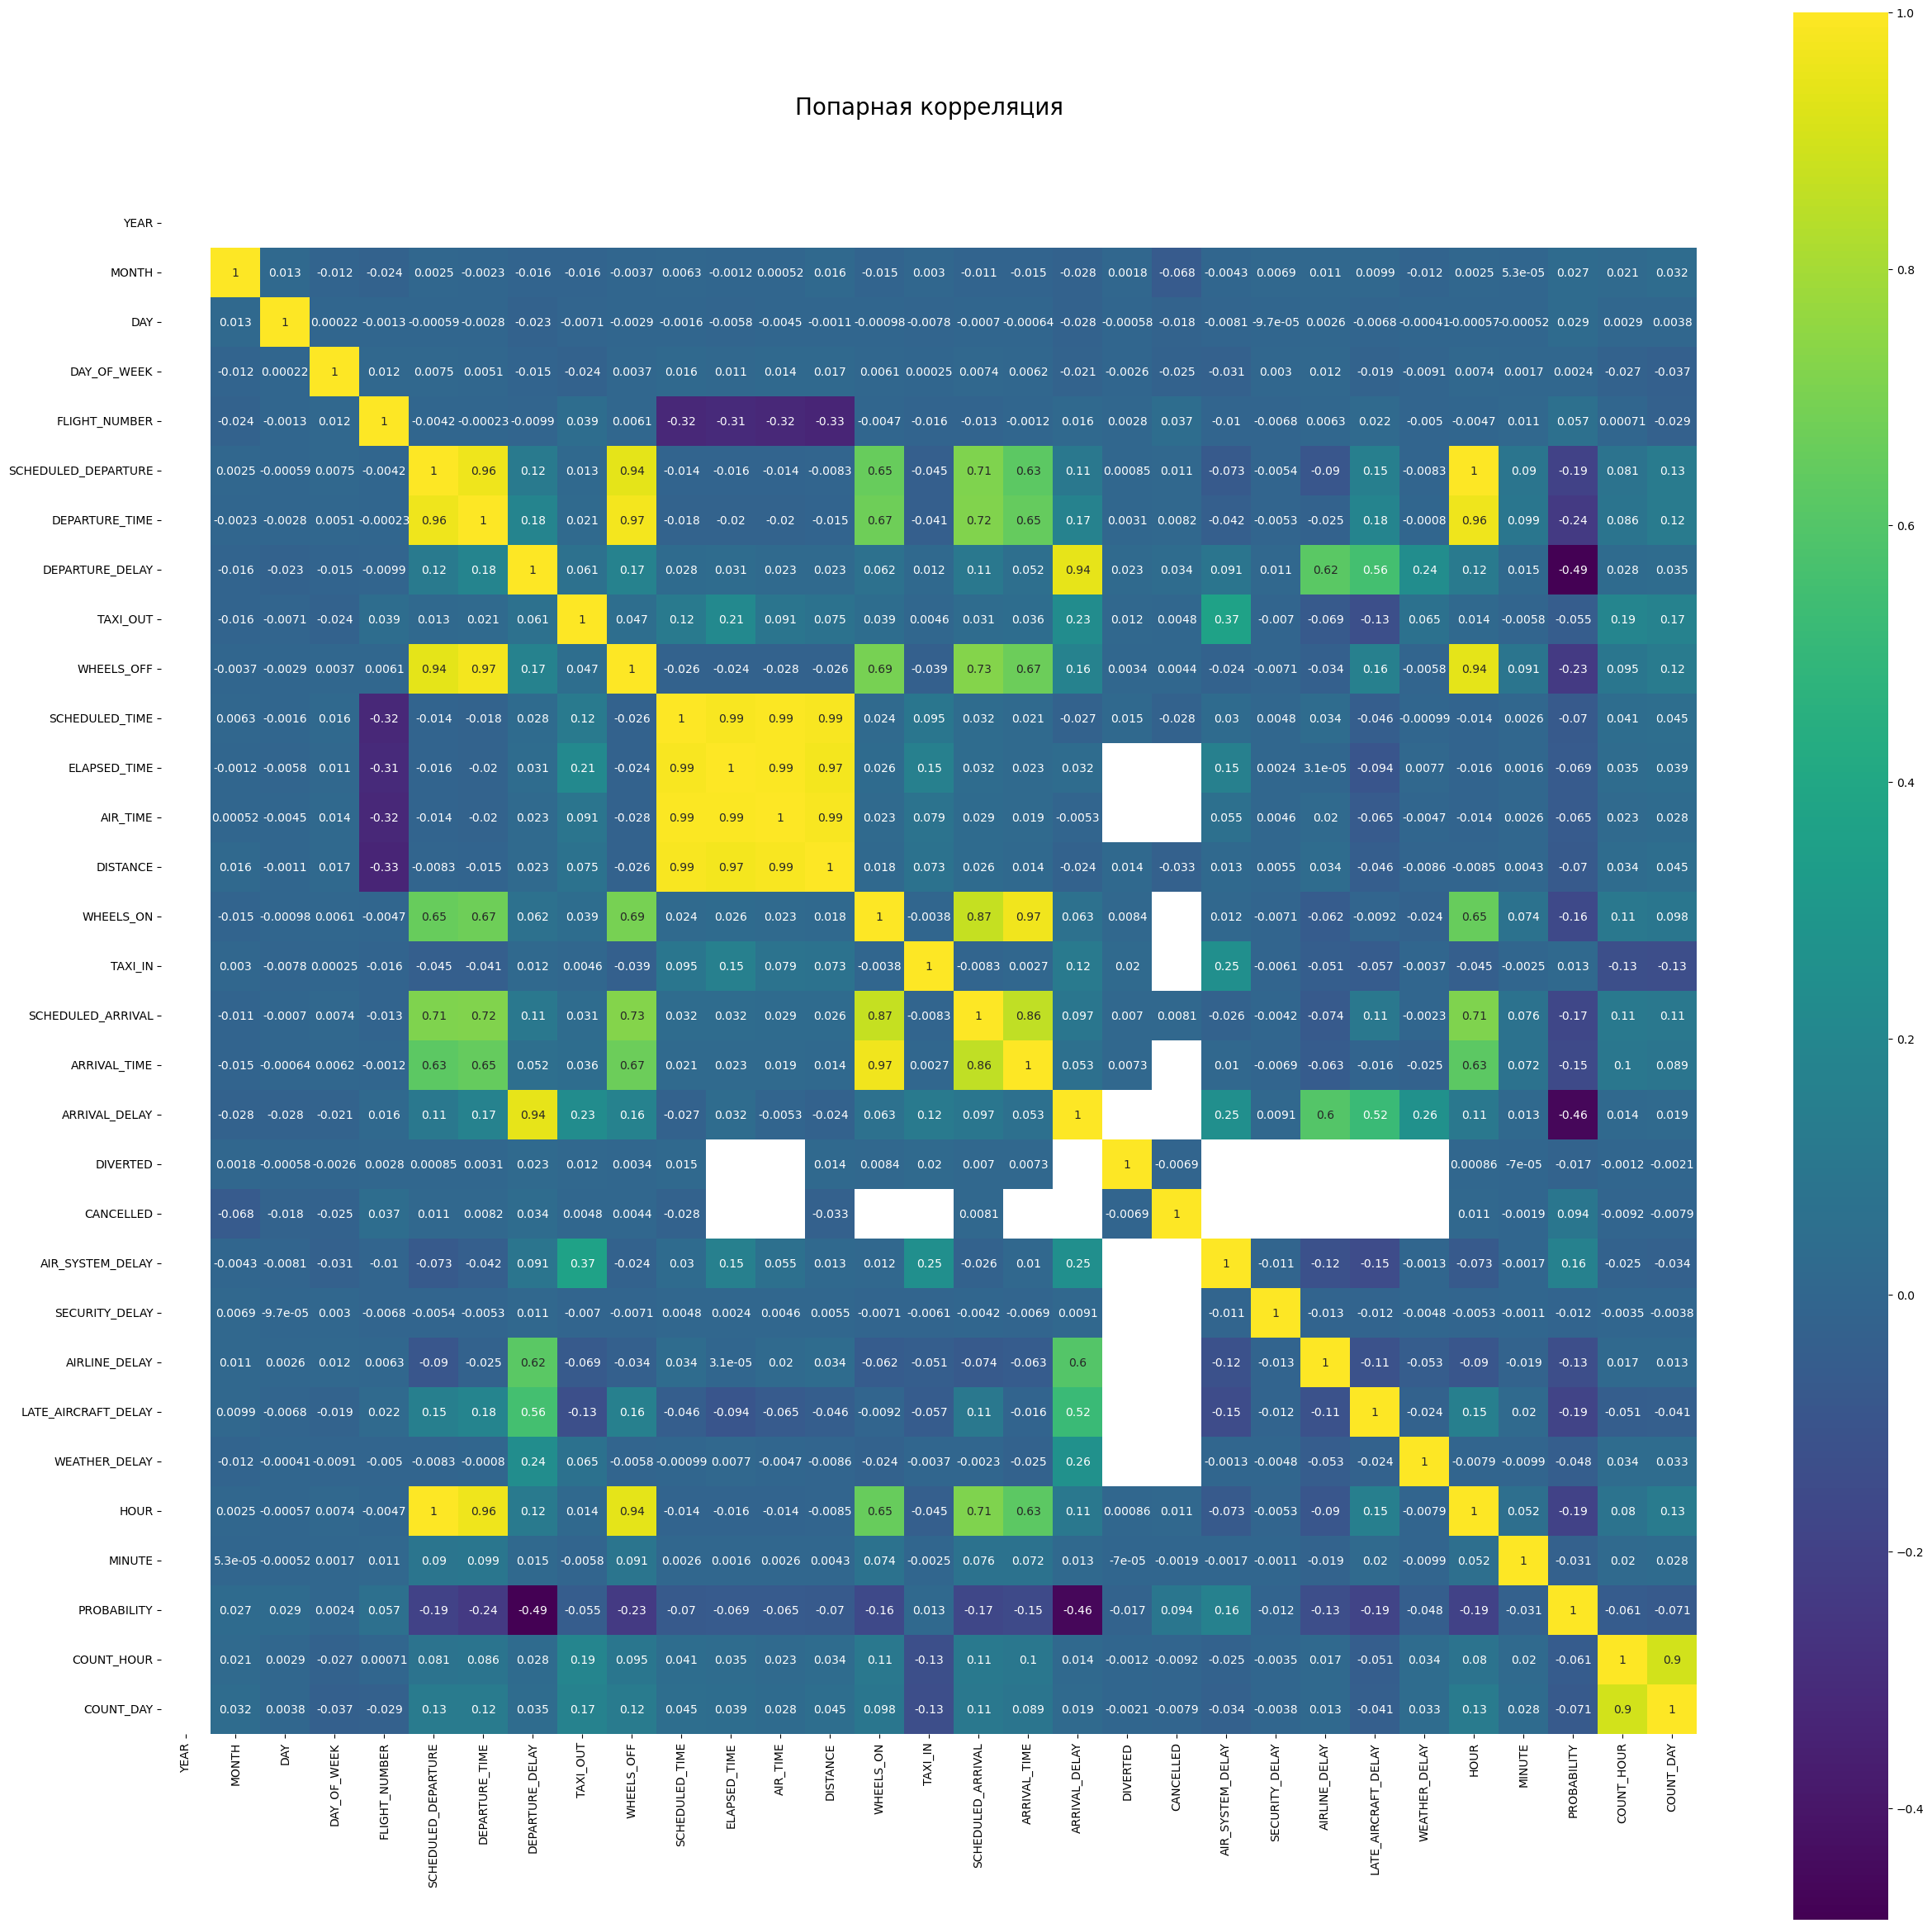

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(flights.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [31]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'HOUR', 'MINUTE', 'DATE_DAY',
       'DATE_TIME', 'DATE_HOUR', 'PROBABILITY', 'COUNT_HOUR', 'COUNT_DAY'],
      dtype='object')

In [49]:
C = flights[['MONTH', 'DAY_OF_WEEK', 'AIRLINE','SCHEDULED_TIME',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DISTANCE',
       'ARRIVAL_DELAY', 'HOUR', 'MINUTE',
       'DATE_HOUR', 'PROBABILITY', 'COUNT_HOUR', 'COUNT_DAY']]

array([<AxesSubplot:title={'center':'0'}>], dtype=object)

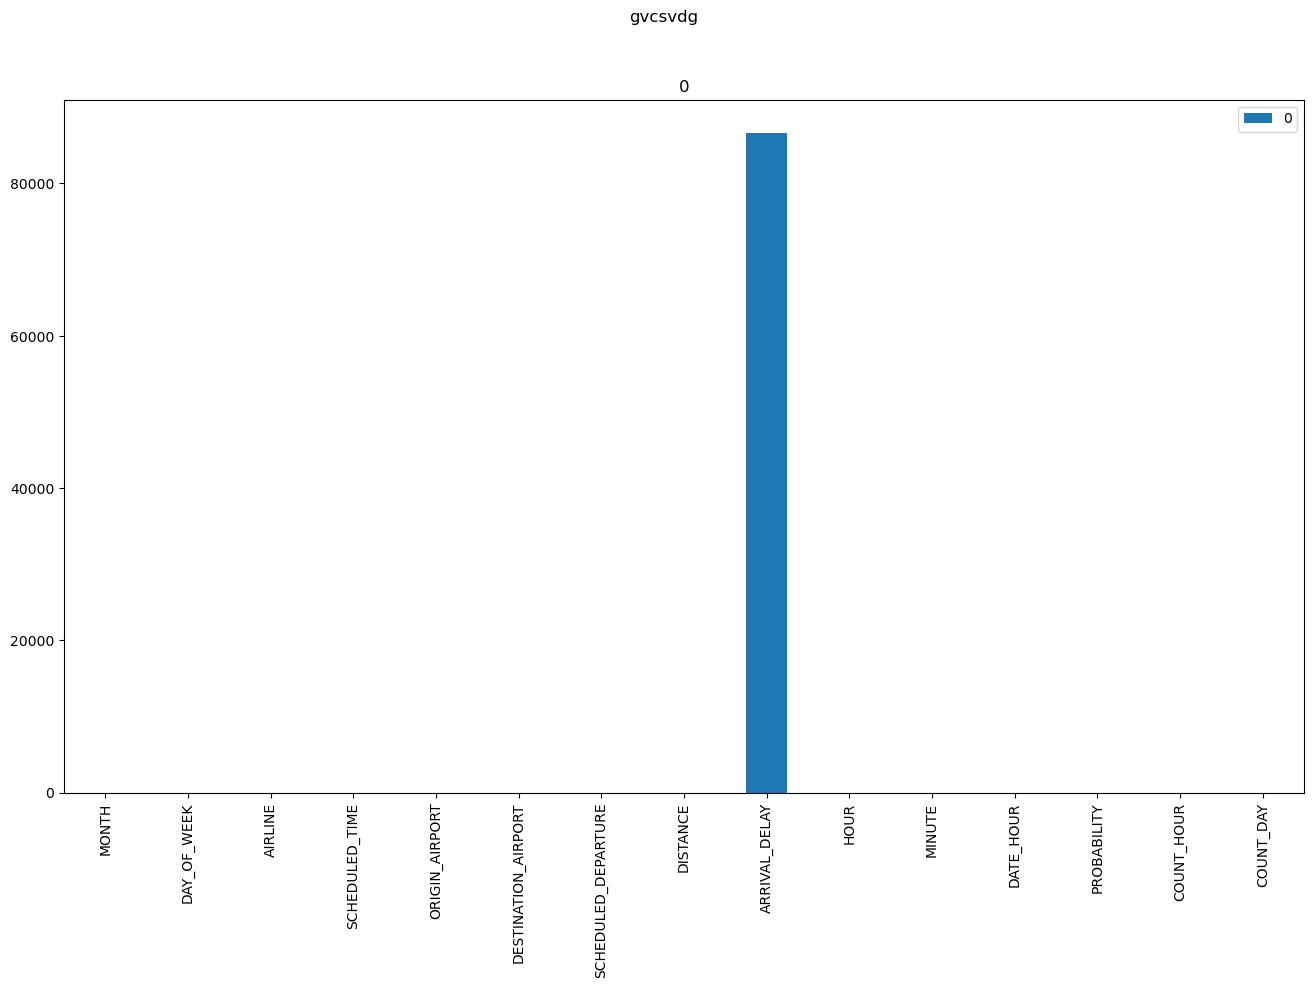

In [51]:
A = pd.DataFrame(C.isna().sum())
A.plot(kind='bar', subplots=True, figsize=[16, 9], legend='1', title='gvcsvdg')


In [34]:
C.dropna(inplace=True)

/var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_21659/3079876781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C.dropna(inplace=True)


In [35]:
a_list = []
le = LabelEncoder()
for column in C.columns:
    if C.dtypes['{}'.format(column)] == 'object':
        a_list.append(column)
        #le = LabelEncoder()
        C['{}'.format(column)] = le.fit_transform(C['{}'.format(column)])
        


/var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_21659/3211659765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['{}'.format(column)] = le.fit_transform(C['{}'.format(column)])


In [10]:
C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4299046 entries, 0 to 4385711
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   MONTH                int64         
 1   DAY_OF_WEEK          int64         
 2   AIRLINE              int64         
 3   SCHEDULED_TIME       float64       
 4   ORIGIN_AIRPORT       int64         
 5   DESTINATION_AIRPORT  int64         
 6   SCHEDULED_DEPARTURE  int64         
 7   DISTANCE             int64         
 8   ARRIVAL_DELAY        float64       
 9   HOUR                 int64         
 10  MINUTE               int64         
 11  DATE_HOUR            datetime64[ns]
 12  PROBABILITY          int64         
 13  COUNT_HOUR           int64         
 14  COUNT_DAY            int64         
dtypes: datetime64[ns](1), float64(2), int64(12)
memory usage: 524.8 MB


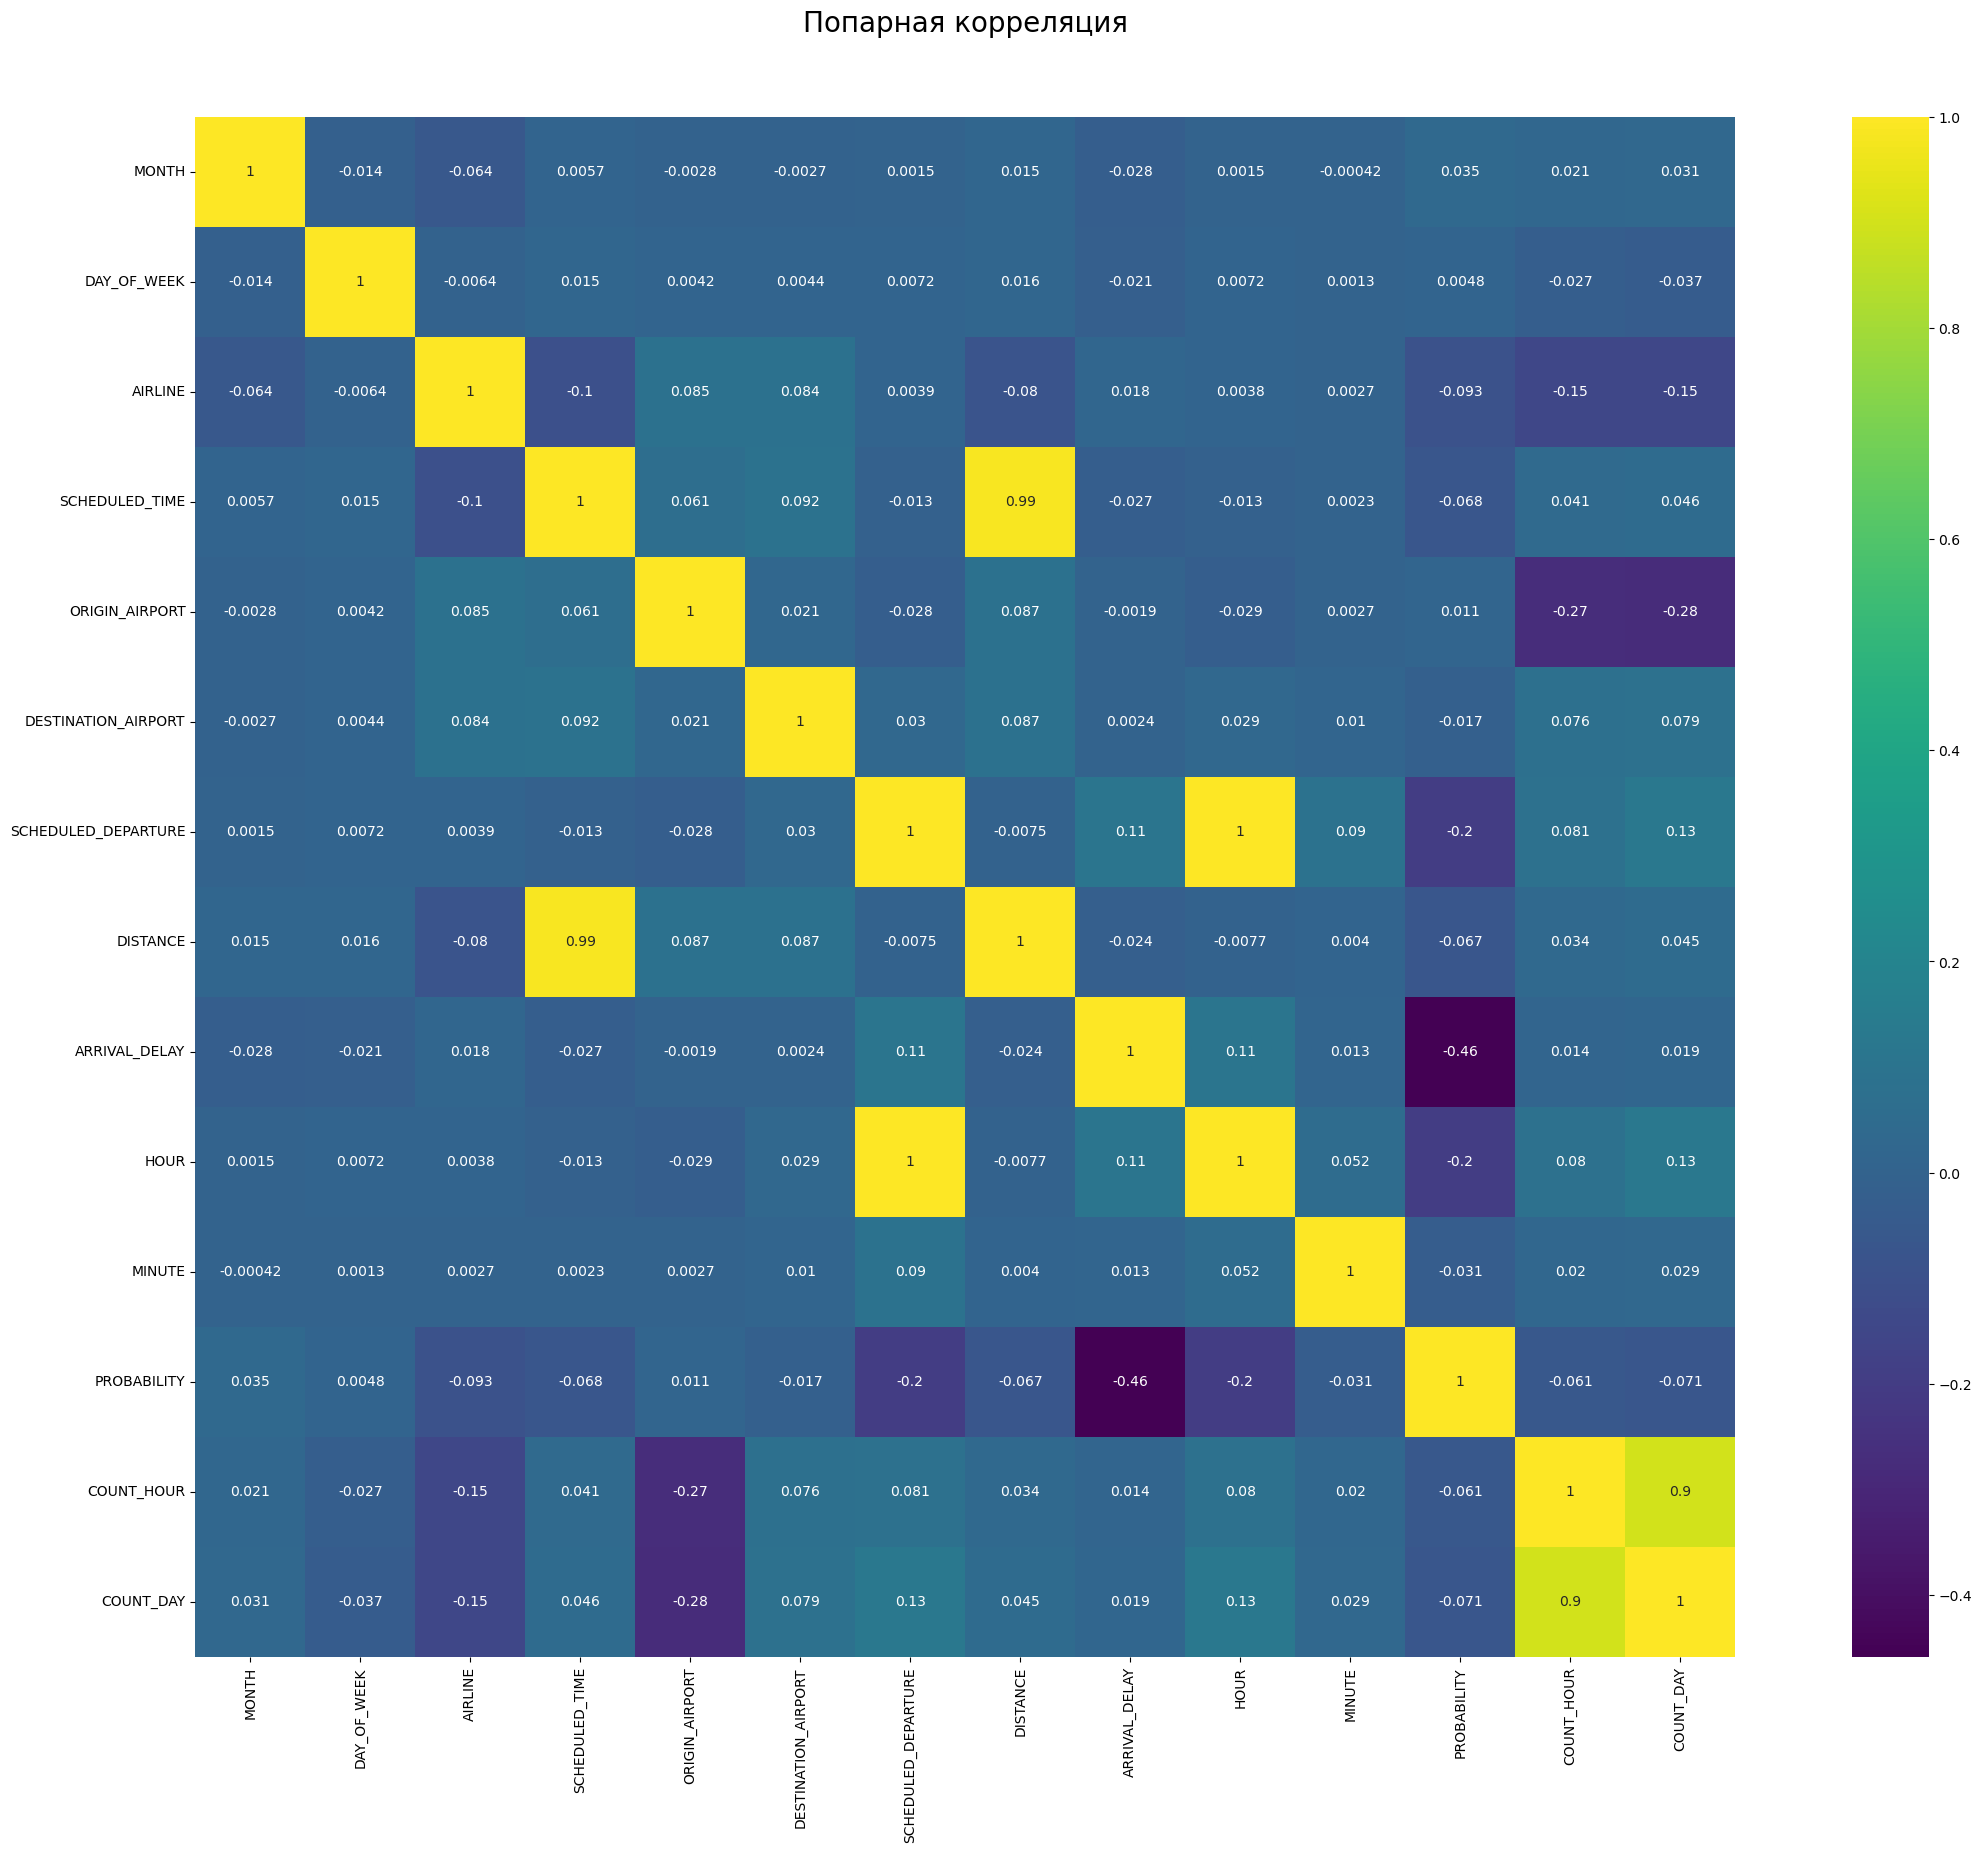

In [36]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(C.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [37]:
C.set_index('DATE_HOUR', inplace=True)

In [13]:
#удаляю выбросы - 1,5 межквантильных размаха из колонки с задержкой прилета
Q1 = C['ARRIVAL_DELAY'].quantile(0.25)
Q3 = C['ARRIVAL_DELAY'].quantile(0.75)
IQR = Q3 - Q1
a = C[(C['ARRIVAL_DELAY'] < Q1-1.5*IQR ) | (C['ARRIVAL_DELAY'] > Q3+1.5*IQR)]['ARRIVAL_DELAY'].reset_index()
    
#список с исключениями
a = list(a.ARRIVAL_DELAY)
#исключаю выбросы
C = C.query("ARRIVAL_DELAY != @a")

In [14]:
C.drop(['PROBABILITY'], axis=1, inplace=True)

In [ ]:
#формирую выборки - обучающую и тестовую
X_train,X_test, y_train, y_test = train_test_split(C.drop('ARRIVAL_DELAY',axis=1),
                                                        C.ARRIVAL_DELAY,
                                                        shuffle = False,# временной ряд, отключаем перемешивание
                                                        test_size = 0.25)

In [ ]:
dtc = DecisionTreeClassifier()
#sc = StandardScaler()
dtc.fit(X_train, y_train)
print('Ошибка на обучающей выборке', (mean_squared_error(y_train, dtc.predict(X_train)))**0.5)
pred = dtc.predict(X_test)
print('Ошибка на тесте', (mean_squared_error(y_test, pred))**0.5)

In [ ]:
y_test = y_test.reset_index()
y_test['PRED'] = list(pred)
y_test = y_test.set_index('DATE_HOUR')
X_test['ARRIVAL_DELAY'] = y_test['ARRIVAL_DELAY']
X_test['PRED'] = y_test['PRED']


In [ ]:
X_test['ARRIVAL_DELAY'].mean()

In [ ]:
X_test['PRED'].mean()

In [ ]:
for column in a_list:
        X_test['{}'.format(column)] = le.inverse_transform(X_test['{}'.format(column)])
X_test['PROBABILITY'] = np.where(X_test['ARRIVAL_DELAY']>0, 0, 1)
X_test['PROBABILITY_PRED'] = np.where(X_test['PRED']>0, 0, 1)


In [ ]:
X_test1 = X_test.reset_index()#.loc[X_test.reset_index()['DATE_HOUR'].between('2015-09-30 00:00:00', '2015-09-30 23:00:00')]


In [ ]:
start_airport = np.random.choice(flights['ORIGIN_AIRPORT'].unique()) 
X_test1['MSE'] = (X_test1['PRED'] - X_test1['ARRIVAL_DELAY'])**2


In [ ]:
X_test1 = X_test1.query("ORIGIN_AIRPORT == '{}'".format(start_airport))

In [ ]:
X_test1.groupby('DESTINATION_AIRPORT').mean().sort_values('MSE', ascending=True)

In [ ]:
A = flights.groupby('DATE_DAY')['HOUR'].count().reset_index().rename(columns={'HOUR':'Количество_вылетов'})
A['Количество_вылетов'] = A['Количество_вылетов']/A['Количество_вылетов'].max()

In [ ]:
B = flights.groupby('DATE_DAY')['PROBABILITY'].mean().reset_index().rename(columns={'PROBABILITY':'Средняя_вероятность'})

In [ ]:
A = A.merge(B, how='left', left_on='DATE_DAY', right_on='DATE_DAY')

In [ ]:
A.set_index('DATE_DAY').plot(figsize=[16,9])

In [ ]:
fig = px.box(flights['ARRIVAL_DELAY'])
fig.show()

In [ ]:
fig = px.box(C['ARRIVAL_DELAY'])
fig.show()

In [ ]:
C

In [ ]:

print (C['ARRIVAL_DELAY']. cov (C['AIRLINE']))


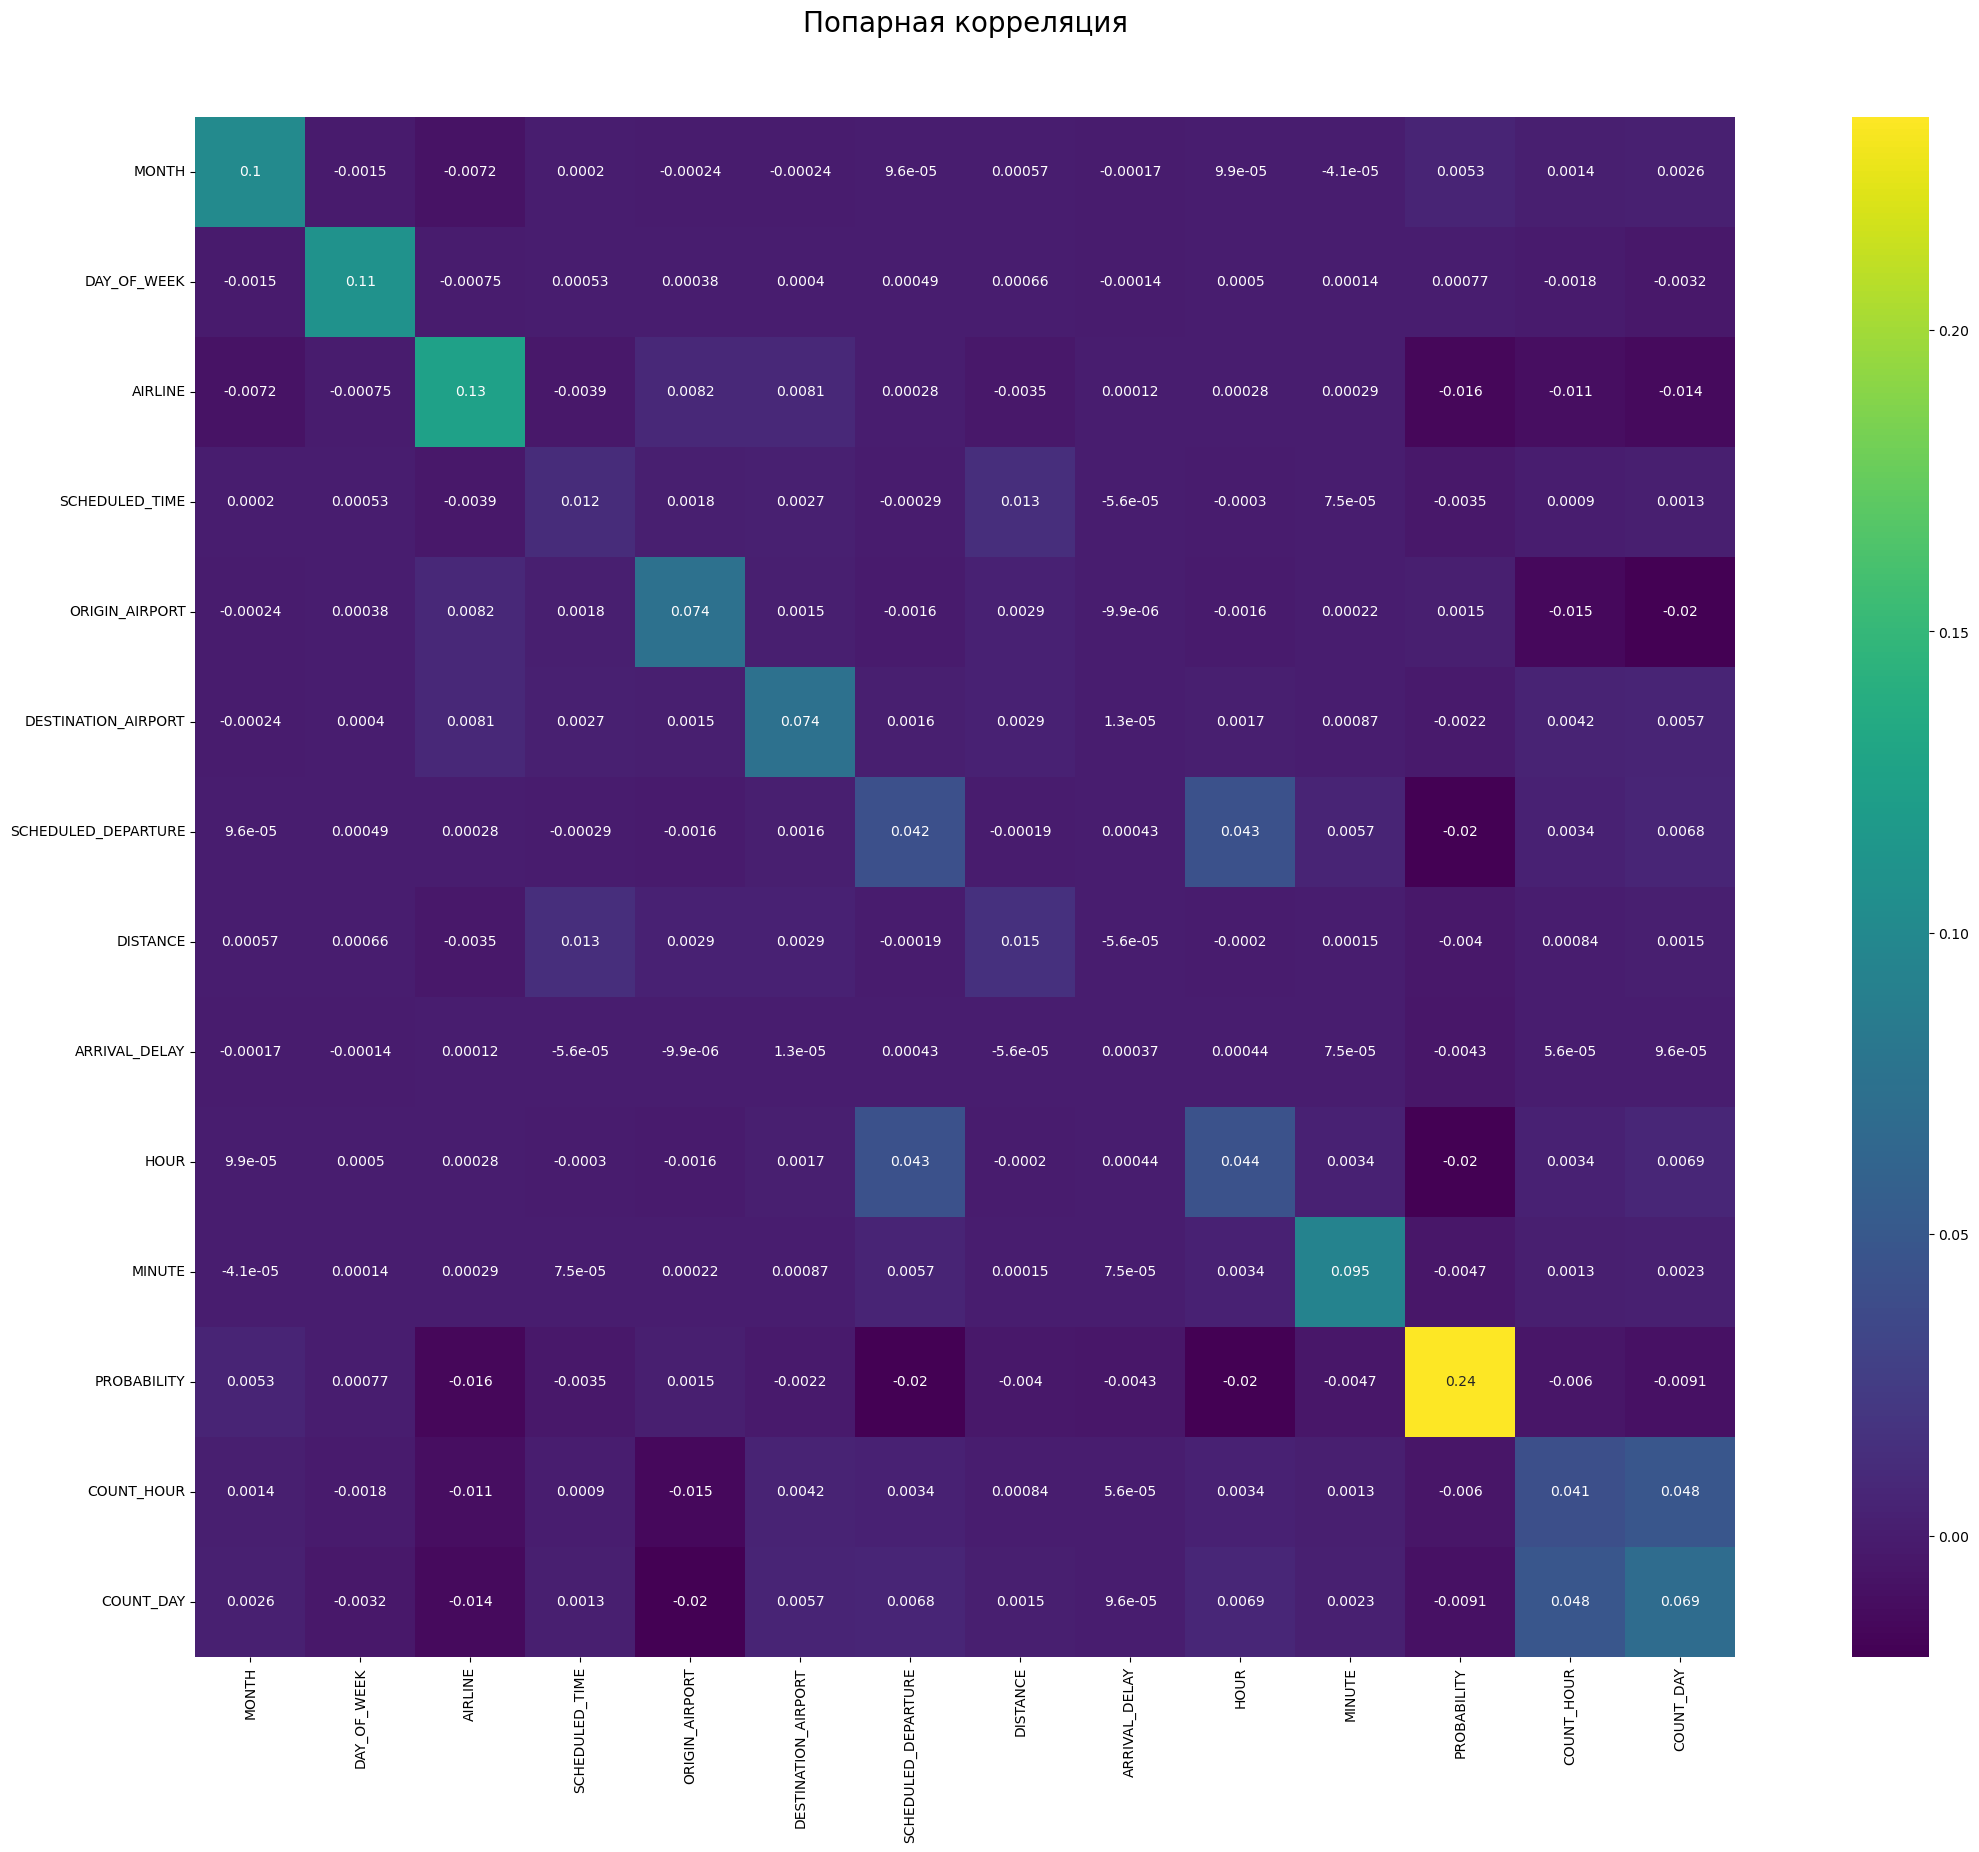

In [48]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(skalre_df.cov(), square=True, annot=True, cmap=colormap)
plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler


In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(C)
col = C.columns
skalre_df = pd.DataFrame(rescaledX, columns=col )




In [47]:
skalre_df

,MONTH,DAY_OF_WEEK,AIRLINE,SCHEDULED_TIME,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,HOUR,MINUTE,PROBABILITY,COUNT_HOUR,COUNT_DAY
0,0.0,0.500000,0.076923,0.267143,0.052960,0.862928,0.001696,0.286147,0.031584,0.0,0.084746,1.0,0.029126,0.033275
1,0.0,0.500000,0.000000,0.374286,0.548287,0.732087,0.003817,0.464257,0.037901,0.0,0.169492,1.0,0.029126,0.485989
2,0.0,0.500000,0.846154,0.382857,0.866044,0.205607,0.008058,0.457391,0.044704,0.0,0.338983,1.0,0.029126,0.373030
3,0.0,0.500000,0.000000,0.381429,0.548287,0.632399,0.008058,0.466680,0.037901,0.0,0.338983,1.0,0.029126,0.485989
4,0.0,0.500000,0.076923,0.310000,0.862928,0.052960,0.010178,0.286147,0.032070,0.0,0.423729,1.0,0.009709,0.246060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299041,1.0,0.333333,0.153846,0.298571,0.517134,0.887850,1.000000,0.316438,0.034985,1.0,1.000000,1.0,0.009709,0.235552
4299042,1.0,0.333333,0.769231,0.251429,0.548287,0.470405,1.000000,0.272213,0.044704,1.0,1.000000,0.0,0.194175,0.525394
4299043,1.0,0.333333,0.769231,0.331429,0.862928,0.470405,1.000000,0.372173,0.023810,1.0,1.000000,1.0,0.106796,0.302102
4299044,1.0,0.333333,0.384615,0.202857,0.542056,0.068536,1.000000,0.213853,0.036443,1.0,1.000000,1.0,0.106796,0.363398


In [ ]:
#функция для генерации колонок
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.DATE_DAY.dt.year
    data['month'] = data.DATE_DAY.dt.month
    data['day'] = data.DATE_DAY.dt.day
    data['dayofweek'] = data.DATE_DAY.dt.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)
    data['y_mean'] = data['ARRIVAL_DELAY'].shift().rolling(rolling_mean_size).mean().copy()

#функция для рассчета вероятности
def get_probability(y_test):
    y_test = y_test.reset_index()
    y_test['probability'] = np.where(y_test['ARRIVAL_DELAY']>0, 0, 1)
    return round(y_test['probability'].mean()*100, 2)

In [ ]:

#выбор случайного наименования аэропорта

#формируем фрейм со случайно выбранным аэропортом вылета
df = flights.query("ORIGIN_AIRPORT == '{}'".format(start_airport))

#будующий фрейм данных, содержит наименование аэропорта прилета, метрику, вероятность, число перелетов в тестовом аборе данных
total = pd.DataFrame(columns=['name', 'RMSE', 'ARRIVAL_DELAY'])

#перебор аэропортов прилета
for d_airport in df['DESTINATION_AIRPORT'].unique():
    d_df = df.query("DESTINATION_AIRPORT == '{}'".format(d_airport))
    
    
    #удаляю выбросы - 1,5 межквантильных размаха из колонки с задержкой прилета
    Q1 = d_df['ARRIVAL_DELAY'].quantile(0.25)
    Q3 = d_df['ARRIVAL_DELAY'].quantile(0.75)
    IQR = Q3 - Q1
    a = d_df[(d_df['ARRIVAL_DELAY'] < Q1-1.5*IQR ) | (d_df['ARRIVAL_DELAY'] > Q3+1.5*IQR)]['ARRIVAL_DELAY'].reset_index()
    
    #список с исключениями
    a = list(a.ARRIVAL_DELAY)
    #исключаю выбросы
    d_df = d_df.query("ARRIVAL_DELAY != @a")
    d = d_df.DATE_DAY.max()
    d_df.loc[(d_df.DATE_DAY == d),'ARRIVAL_DELAY']=0


    try:   

        #генерируем показатели
        d_df = d_df.groupby('DATE_DAY')['ARRIVAL_DELAY'].mean().reset_index()
        make_features(d_df,21,7)
        d_df.dropna(inplace=True)
        d_df.set_index('DATE_DAY', inplace=True)



        #формирую выборки - обучающую и тестовую
        X_train,X_test, y_train, y_test = train_test_split(d_df.drop('ARRIVAL_DELAY',axis=1),
                                                        d_df.ARRIVAL_DELAY,
                                                        shuffle = False,# временной ряд, отключаем перемешивание
                                                        test_size = 0.25)

        #обучаю и делаю предсказание
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)

        #формирую словарь, далее будем накапливать данные в df total
        t = {'name':'{}'.format(d_airport), 'RMSE':round(np.sqrt(mean_squared_error(y_test, pred)), 2), 
        'ARRIVAL_DELAY':round(pred[-1], 2)}
        total = total.append(t, ignore_index=True)

    except Exception as e:
        continue



#добавляю и аэропорт вылета(нужен для дальнейшего постоения графика, данные в словаре формируют большой желтый point на карте - аэропорт вылета)
t = {'name':'{}'.format(start_airport), 'RMSE':total.RMSE.mean()*2, 'ARRIVAL_DELAY':0}
#сортируем данные по метрике и вероятности положительного исхода прилета
total = total.sort_values(by=['RMSE','ARRIVAL_DELAY'],ascending=[True, True])
total = total.head(3)
total = total.append(t, ignore_index=True)


map_air = airports.merge(total, how='right', left_on='IATA_CODE', right_on='name')

print(total.set_index('name')[:-1])


fig = px.scatter_mapbox(total,
                        lon = map_air.LONGITUDE,
                        lat = map_air.LATITUDE,
                        zoom = 3,
                        color = map_air.RMSE,
                        size = map_air.RMSE,
                        width = 800,
                        height = 600,
)
fig.update_layout(mapbox_style='open-street-map')
fig.show()


<AxesSubplot:xlabel='AIRLINE'>

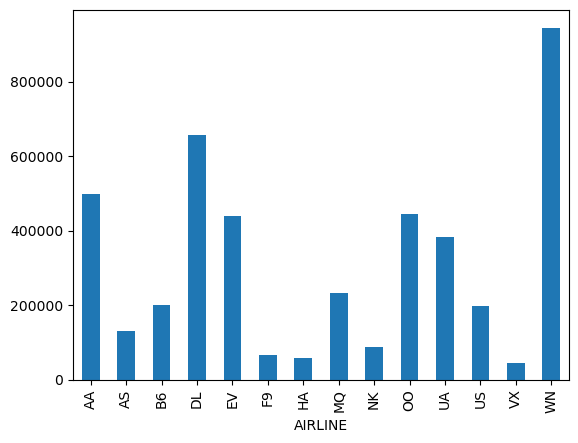

In [27]:
flights.groupby('AIRLINE')['DATE_HOUR'].count().plot(kind='bar')

<AxesSubplot:title={'center':'gvcsvdg'}, xlabel='bdsvu'>

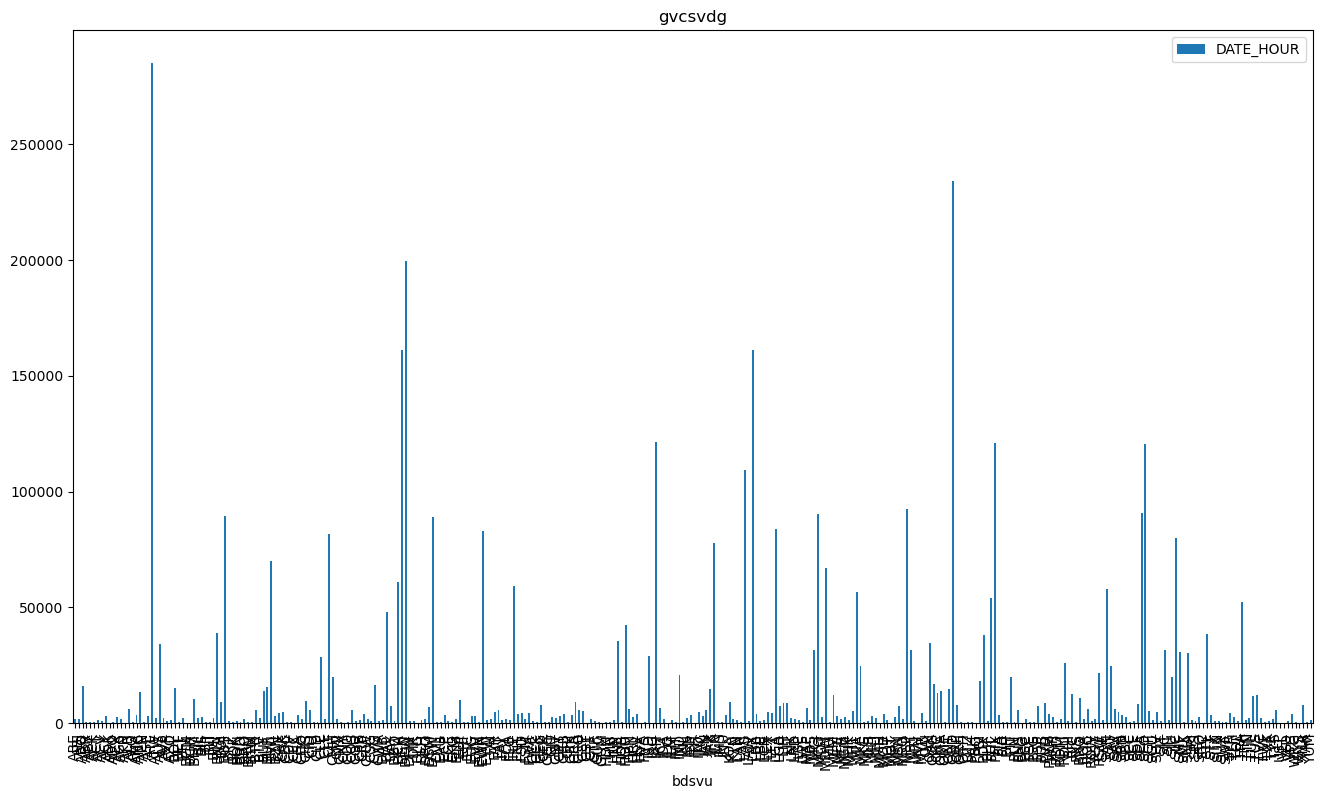

In [35]:
#plt.axis('off')

A = flights.groupby('ORIGIN_AIRPORT')['DATE_HOUR'].count()
A.plot(kind='bar', title='gvcsvdg', figsize=[16, 9], legend=True, xlabel='bdsvu')


In [39]:
A = A.reset_index()

In [47]:
A.ORIGIN_AIRPORT.nunique()

322

(array([280.,  18.,  10.,   6.,   3.,   2.,   1.,   0.,   1.,   1.]),
 array([1.200000e+01, 2.850180e+04, 5.699160e+04, 8.548140e+04,
        1.139712e+05, 1.424610e+05, 1.709508e+05, 1.994406e+05,
        2.279304e+05, 2.564202e+05, 2.849100e+05]),
 <BarContainer object of 10 artists>)

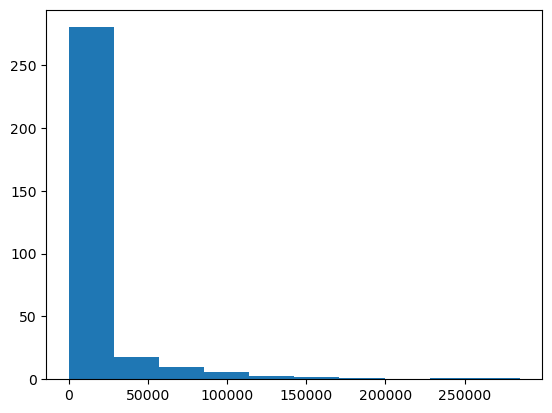

In [42]:
plt.hist(x=A.DATE_HOUR)

In [43]:
a = flights.groupby('ORIGIN_AIRPORT')['DATE_HOUR'].count().sort_values(ascending=False).reset_index()
b = airports.merge(a, how='right', left_on='IATA_CODE', right_on='ORIGIN_AIRPORT')

In [46]:
fig = px.scatter_mapbox(b,
                        lon = b.LONGITUDE,
                        lat = b.LATITUDE,
                        zoom = 3,
                        color = b.DATE_HOUR,
                        size = b.DATE_HOUR,
                        hover_name="IATA_CODE",
                        width = 800,
                        height = 600,
)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [62]:
airports.IATA_CODE.unique()

array(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY',
       'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC',
       'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL',
       'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI',
       'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO',
       'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE',
       'CAK', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CID', 'CIU',
       'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD',
       'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB',
       'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DIK', 'DLG',
       'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP', 'EGE', 'EKO',
       'ELM', 'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW',
       'FAI', 'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD',
       'FSM', 'FWA', 'GCC', 'GCK', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV',
       'GPT', 'GRB',